<a href="https://colab.research.google.com/github/bingsen-wang/Electric-Machines/blob/main/gear_3Speeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Sun-Planet Gear</h1></b>

Dr. Bingsen Wang

8/3/2024
</center>

#Python Code
The Python code illustrates a gear.

0
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
0


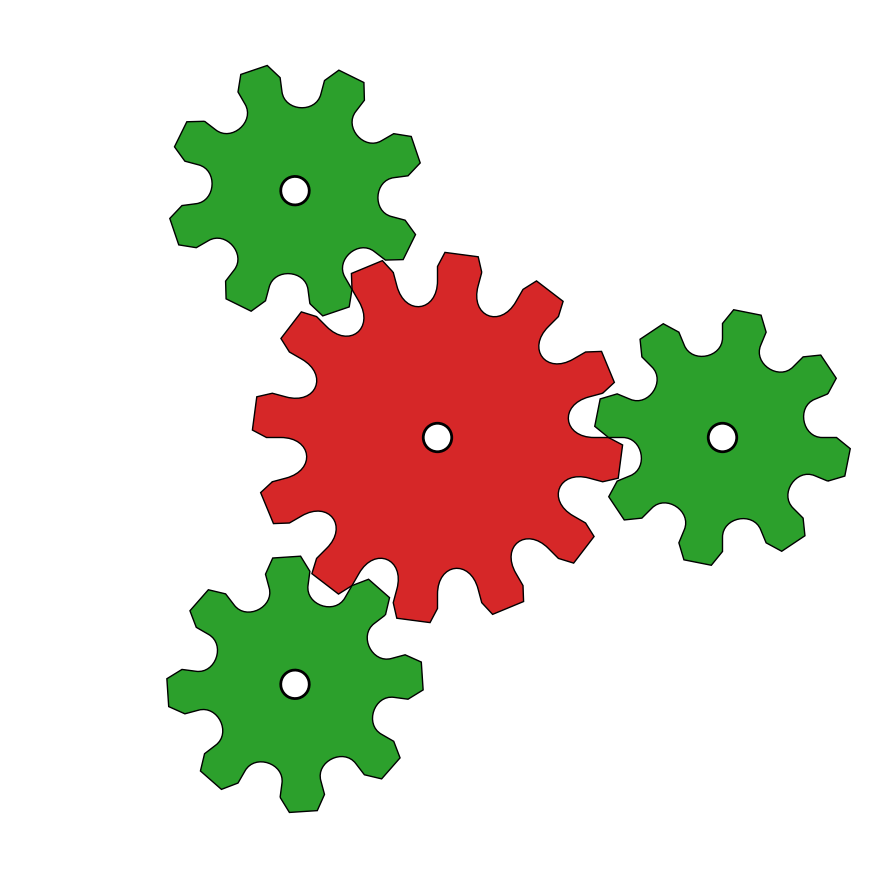

In [10]:
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,tan,pi,exp,angle,array,sqrt
from numpy import heaviside as hs
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.patches import FancyArrow as fa
from matplotlib.path import Path
from matplotlib.patches import PathPatch,Arc
from matplotlib.collections import PathCollection as pc
from matplotlib.transforms import Affine2D
from matplotlib import animation,colors
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

def axis_reset(ax): #clear axis for redrawing
  xy=ax.axis(); ax.cla(); ax.axis('off'); ax.set(xlim=xy[:2],ylim=xy[-2:])
  return

def draw_gear(ax,xy,z,m,alpha,theta,fc='w',ec='k'):
  ha,hf = .5*m, .5*m
  r,rf,ra = z*m/2,z*m/2-hf,z*m/2+ha
  verts,codes = [],[]
  angles = np.array([.5,.5,.5,0,0,0,-ha*tan(alpha)/ra,-.5+ha*tan(alpha)/ra,-.5])
  rs = np.array([r,rf,.8*rf,.8*rf,rf,r,ra,ra,r])
  for k in range(z):
    pts=exp(-1j*2*pi/z*k)*exp(1j*angles*2*pi/z)*rs
    verts += list(zip(pts.real,pts.imag))
    codes += [Path.LINETO]*2+[Path.CURVE4]*3+[Path.LINETO]*(len(pts)-5)
  t = Affine2D().rotate(theta).translate(*xy)+ax.transData #transform
  patch = PathPatch(Path(verts, [Path.MOVETO]+codes[1:]), fc=fc,
                    ec=ec,lw=1,transform=t)
  ax.add_patch(patch)
  ax.add_patch(mp.Circle((0,0),.1,fc='w',ec=ec,lw=2,transform=t))
  return

#parameters
Nfps = 300 #number of frames
t=linspace(0,.5,Nfps)
m = .2 #module number, not to the ISO standard
alpha = 45/180*pi #pressure angle in rad
zp = 8 #teeth number of planet gear
zs = 12 #teeth number of sun gear
da = m*(zp+zs)/2 #distance between gears
wrs = 2*pi
wrp = [wrs/3,wrs,5/3*wrs] #rotation speed of the planet gear center around sun gear

#plotting
xylim = [[-3,3] for _ in range(2)]
clst=['tab:red','tab:green','tab:purple','tab:orange','tab:blue','tab:brown','k','w'] #colors light bg
fig = plt.figure(figsize=(9,9))
ax = fig.add_axes((.025,.025,.95,.95),xlim=xylim[0],ylim=xylim[1],fc='none')
ax.axis('off')

# animation function. This is called sequentially
def animate(i):
  # i=700
  if i%50==0: print(i)
  ii=int(i/Nfps)
  i = i%Nfps
  axis_reset(ax) #clear axis
  draw_gear(ax,(0,0),zs,m,alpha,wrs*t[i],fc=clst[0])
  for k in range(3):
    draw_gear(ax,(da*cos(wrp[ii]*t[i]+k*2*pi/3),da*sin(wrp[ii]*t[i]+k*2*pi/3)),zp,m,alpha,wrp[ii]*t[i]-(wrs-wrp[ii])*t[i]*zs/zp+k*2*pi/3,fc=clst[1+ii])
  return
anim = animation.FuncAnimation(fig, animate, frames=Nfps*3)
anim.save("BasicGear3speeds.mp4", writer=animation.FFMpegWriter(fps=30),dpi = 200)

